#Caricamento del dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/Bank Customer Churn Prediction.csv', sep = ',', names=["customer id","credit score","country","gender","age","tenure","balance","products number","credit card","active member","estimated salary","churn"])
df = df.drop(0)

In [ ]:
df

,customer id,credit score,country,gender,age,tenure,balance,products number,credit card,active member,estimated salary,churn
1,15634602,619,France,Female,42,2,0,1,1,1,101348.88,1
2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,502,France,Female,42,8,159660.8,3,1,0,113931.57,1
4,15701354,699,France,Female,39,1,0,2,0,0,93826.63,0
5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,771,France,Male,39,5,0,2,1,0,96270.64,0
9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,709,France,Female,36,7,0,1,0,1,42085.58,1
9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


##Analisi Esplorativa del dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 1 to 10000
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer id       10000 non-null  object
 1   credit score      10000 non-null  object
 2   country           10000 non-null  object
 3   gender            10000 non-null  object
 4   age               10000 non-null  object
 5   tenure            10000 non-null  object
 6   balance           10000 non-null  object
 7   products number   10000 non-null  object
 8   credit card       10000 non-null  object
 9   active member     10000 non-null  object
 10  estimated salary  10000 non-null  object
 11  churn             10000 non-null  object
dtypes: object(12)
memory usage: 937.6+ KB


In [ ]:
df.describe()

,customer id,credit score,country,gender,age,tenure,balance,products number,credit card,active member,estimated salary,churn
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,10000,460,3,2,70,11,6382,4,2,2,9999,2
top,15634602,850,France,Male,37,2,0,1,1,1,24924.92,0
freq,1,233,5014,5457,478,1048,3617,5084,7055,5151,2,7963


In [ ]:
# Check columns list and missing values
df.isnull().sum()

customer id         0
credit score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products number     0
credit card         0
active member       0
estimated salary    0
churn               0
dtype: int64

In [ ]:
# Get unique count for each variable
df.nunique()

customer id         10000
credit score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products number         4
credit card             2
active member           2
estimated salary     9999
churn                   2
dtype: int64

In [ ]:
df['churn'].value_counts()


0    7963
1    2037
Name: churn, dtype: int64

# **Data Balancing**

In [ ]:
df = df.drop('customer id', 1)

In [ ]:
X = df.iloc[:, 0:10].values

y = df.iloc[:, 10].values

In [ ]:
y

array(['1', '0', '1', ..., '1', '1', '0'], dtype=object)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X, y = ros.fit_resample(X, y)

Label encoding: Using LabelEncoder to transform categorical variables into continuous variables.


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder_country = LabelEncoder()
label_encoder_gender = LabelEncoder()

X[:,1] = label_encoder_country.fit_transform(X[:,1])
X[:,2] = label_encoder_gender.fit_transform(X[:,2])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
! pip install lazypredict

from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(predictions=True)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 29/29 [00:59<00:00,  2.06s/it]

Empty DataFrame
Columns: [Accuracy, Balanced Accuracy, ROC AUC, F1 Score, Time Taken]
Index: []


## **Gaussian naive bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
previsoes = naive_bayes.predict(X_test)
confusao = confusion_matrix(y_test, previsoes)

cm = ConfusionMatrix(naive_bayes)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [ ]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

## **K-NN**

{'n_neighbors': 1} 0.8542071446539948
              precision    recall  f1-score   support

           0       0.96      0.77      0.86      1590
           1       0.81      0.97      0.88      1596

    accuracy                           0.87      3186
   macro avg       0.89      0.87      0.87      3186
weighted avg       0.89      0.87      0.87      3186



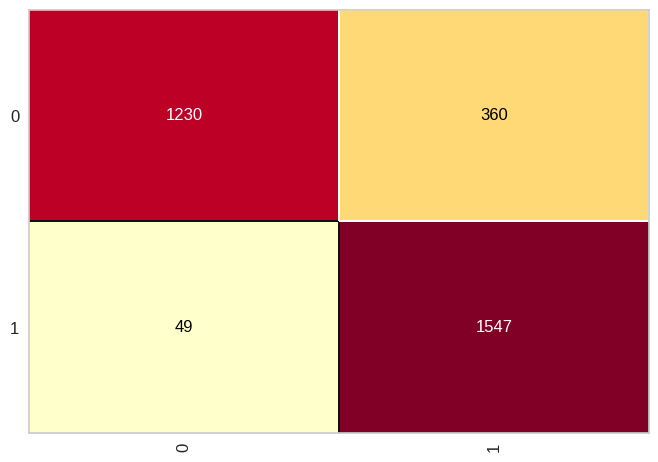

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric = 'minkowski', p = 2)  # minkowski, p=2 -> euclidean distance

# Here we use the GridSearch to figure out the best metrics to use in this model.

k_list = list(range(1,31))

k_values = dict(n_neighbors = k_list)

from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(knn, k_values, cv = 10, scoring = 'f1_macro')
grid.fit(X_train, y_train)

print( grid.best_params_, grid.best_score_ )

#Running K Neighbors

knn = KNeighborsClassifier(n_neighbors = grid.best_params_['n_neighbors'], metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)
KNeighborsClassifier(n_neighbors=1)
previsoes = knn.predict(X_test)

cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

classification_knn = (classification_report(y_test, previsoes))
print(classification_knn)

## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="gini") #gini è il valore di default, quindi potremmo anche omettere il parametro
tree.fit(X_train, y_train)

y_pred_train = tree.predict(X_train)
y_pred = tree.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred)

print("ACCURACY: TRAIN=%.4f TEST=%.4f" % (accuracy_train,accuracy_test))

ACCURACY: TRAIN=1.0000 TEST=0.9105


## **Random Forest**

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1590
           1       0.92      0.99      0.95      1596

    accuracy                           0.95      3186
   macro avg       0.95      0.95      0.95      3186
weighted avg       0.95      0.95      0.95      3186



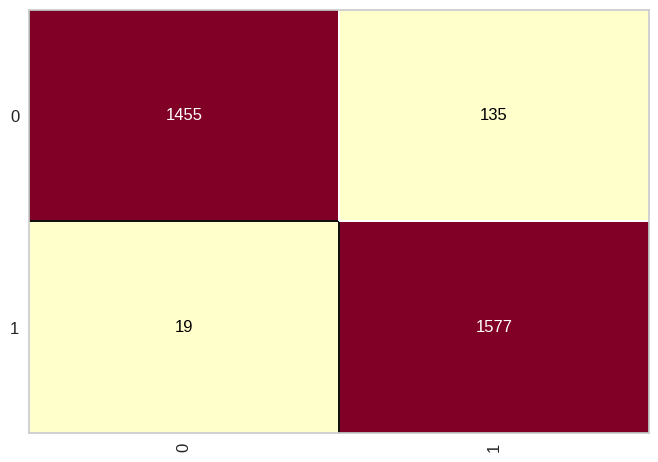

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

forest = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)

cm = ConfusionMatrix(forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

classification_forest = (classification_report(y_test, forest_pred))
print(classification_forest)

In [ ]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
print(forest.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
